# Probando Clasificación con Gradiente descendente con Datos uso de suelo

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Cargando dos clases de vectores de uso de suelo$**

In [93]:

df_0= pd.read_csv("data/developed_data_0.csv")
df_1= pd.read_csv("data/developed_data_1.csv")
df_0 = df_0.drop(['Unnamed: 0'], axis=1)
df_1 = df_1.drop(['Unnamed: 0'], axis=1)

df_0["developed"]=0
df_1["developed"]=1

ix_0,ix_1 = (np.arange(len(df_0)), np.arange(len(df_1)) )
np.random.shuffle(ix_0)
np.random.shuffle(ix_1)

trn = int(len(ix_1)*0.7)
result = pd.concat([df_0.iloc[ix_0[:trn]],df_1.iloc[ix_1[:trn]]])

result_tr = pd.concat([df_0.iloc[ix_0[trn:]],df_1.iloc[ix_1[trn:]]])

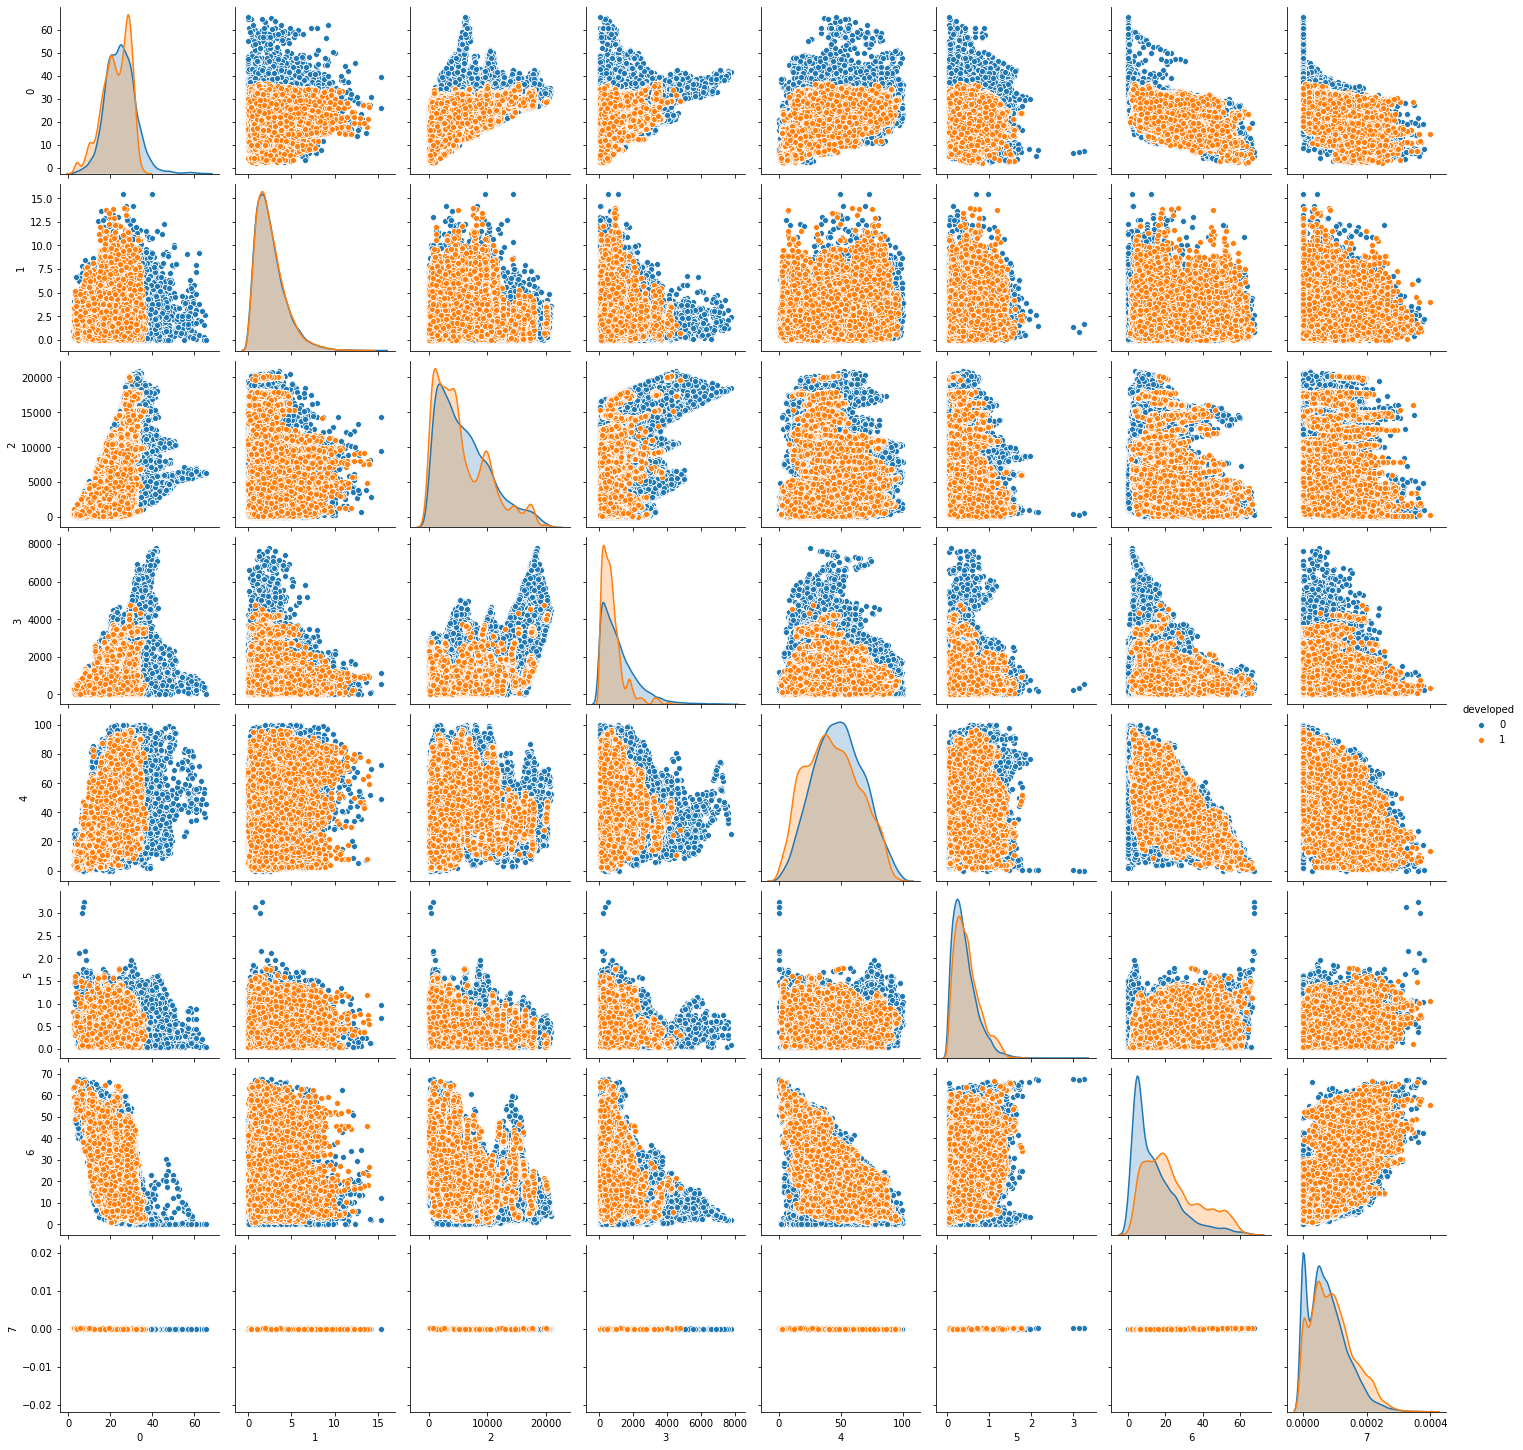

In [83]:
sns.pairplot(result,hue = "developed")
plt.show()

**Generando una sola base de datos de datos clasificados**

In [94]:
labeled_classes  = np.array(result)
len(labeled_classes)

30276

Definimos nuestra función de "costo". Decidimos implementar la derivada de la verosimilitud 

$\frac{\partial LL(\theta)}{\partial \theta_j} = \sum_{i=1}^n [y_i-sigm(\theta^T\mathbf{x}_i)]x_j$

**La programación de la derivada de la función de costo **

In [95]:
#def pd(x,y,a):
#    s = 0    
#    for i in np.arange(len(x)):
#        dif = ((y[i]-a*x[i]))
#        s = s + dif*(x[i])
#    return s

In [96]:
pd = 0


    
    
    



**Utilizando modelo sin Bias**
        
$\mathbf{wx}=0$

In [7]:
bias = 0
n = 0.01
sigm = lambda x: 1/(1 + np.exp(-x))



param = [1,2]

#inicializar parametros theta
m = len(param)


#repetir varias veces
for k in range(1000):
    
    #inicializar gradiente
    g = np.zeros(m)

    #por cada tupla (x,y)
    for v in labeled_classes:
        s = 0
        x = v[:2]
        y = v[2]
        
        # por cada parametro
        for j in np.arange(m):
            line = np.matmul(param,x)
            g[j] += (y-sigm(line))*x[j]
            
    param += n*g



In [8]:
print("w_1,w_2",param)
print("w_0 (bias) = ",bias)

w_1,w_2 [-44.08955128  34.00058564]
w_0 (bias) =  0


In [9]:
# ecuación de la sigmoide sin bias
def f(x):
    return sigm(np.matmul(x,param))
    

pred = (np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1
print("errores de clasificación: ", np.sum((pred-labeled_classes[:,2])**2))

errores de clasificación:  52.0


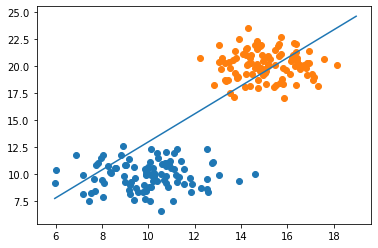

In [10]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
X = np.arange(hmin,hmax)


plt.plot(X,(-param[0]/param[1])*X)
plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])
plt.show()

Ahora considerando: 

**Utilizando modelo con Bias**
        
$\mathbf{wx}_i+w_0=0$

$x_0w_0$ con $x_0 =  1$

**Modelo sin entrenar**

In [119]:
#inicializar parametros theta
nv = np.shape(result)[1]-1

param = np.ones(nv)*100

#inicializar w_0 (bias)
bias = 1

In [120]:
#Ecuación de la sigmoide
sigm = lambda x: 1/(1 + np.exp(-x))

def f(x,bias=bias):
    return sigm(np.matmul(x,param)+bias)

pred = (np.array(list(map(f,labeled_classes[:,:-1])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))

Errores de clasificación: 15138.0


In [121]:
n = 0.00001


#inicializar parametros theta


#inicializar w_0 (bias)
bias = 0

#repetir varias veces
for k in range(100):
    print("iter",k)
    #inicializar gradiente parametros + bias
    g = np.zeros(nv+1)

    #por cada tupla (x,y)
    for v in labeled_classes:
    
        #asignamos la pareja (o tupla) (x_i,y_i)
        x = v[:-1]
        y = v[-1]
        
        # por cada parametro
        line = np.matmul(x,param)+1*bias
        for j in np.arange(nv):
    
            #gradiente evaluado con respecto a w_1 y w_2 en la derivada de la funcion de log-verosimilitud
            g[j]+=(y-sigm(line))*x[j]

        
        #gradiente evaluado con respecto a w_0
        g[nv] += (y-sigm(line))*1

        
    #actualización de los parámetros
    param += n*g[:-1]
    bias += n*g[-1]

    pred = (np.array(list(map(f,labeled_classes[:,:-1])))>0.5)*1
    print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))
    
print("parametros w_1 y w_2",+param)    
print("w_0 (bias)",bias)

iter 0


/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Errores de clasificación: 15138.0
iter 1
Errores de clasificación: 15138.0
iter 2
Errores de clasificación: 15138.0
iter 3
Errores de clasificación: 15133.0
iter 4
Errores de clasificación: 15138.0
iter 5
Errores de clasificación: 15138.0
iter 6
Errores de clasificación: 15138.0
iter 7
Errores de clasificación: 15138.0
iter 8
Errores de clasificación: 15135.0
iter 9
Errores de clasificación: 15138.0
iter 10
Errores de clasificación: 15143.0
iter 11
Errores de clasificación: 15138.0
iter 12
Errores de clasificación: 15201.0
iter 13
Errores de clasificación: 15138.0
iter 14
Errores de clasificación: 15429.0
iter 15
Errores de clasificación: 15138.0
iter 16
Errores de clasificación: 15087.0
iter 17
Errores de clasificación: 15138.0
iter 18
Errores de clasificación: 14652.0
iter 19
Errores de clasificación: 15138.0
iter 20
Errores de clasificación: 14528.0
iter 21
Errores de clasificación: 15138.0
iter 22
Errores de clasificación: 14639.0
iter 23
Errores de clasificación: 15138.0
iter 24
E

In [74]:
#Ecuación de la sigmoide

def f(x,bias=bias):
    return sigm(np.matmul(x,param)+bias)

pred = (np.array(list(map(f,labeled_classes[:,:-1])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))

Errores de clasificación: 105.0


/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [78]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [76]:
labeled_classes[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

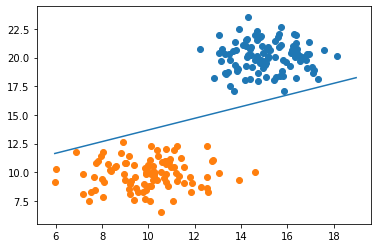

In [16]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
X = np.arange(hmin,hmax)
Y = (-param[0]/param[1])*X-(bias/param[1])
plt.plot(X,Y)
plt.scatter(class01[:,0],class01[:,1])
plt.scatter(class00[:,0],class00[:,1])
plt.show()